<a href="https://colab.research.google.com/github/fatemehes75/Regression/blob/main/Fit_S_curve_to_China's_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fit S_curve to China's GDP from 1960 to 2014.ipynb

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2023-04-18 17:38:42 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


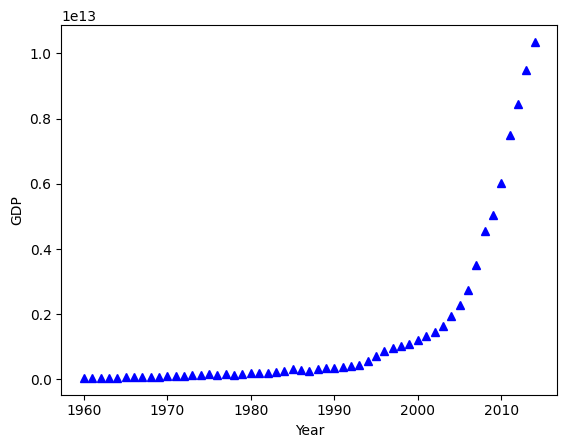

In [2]:
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'b^')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

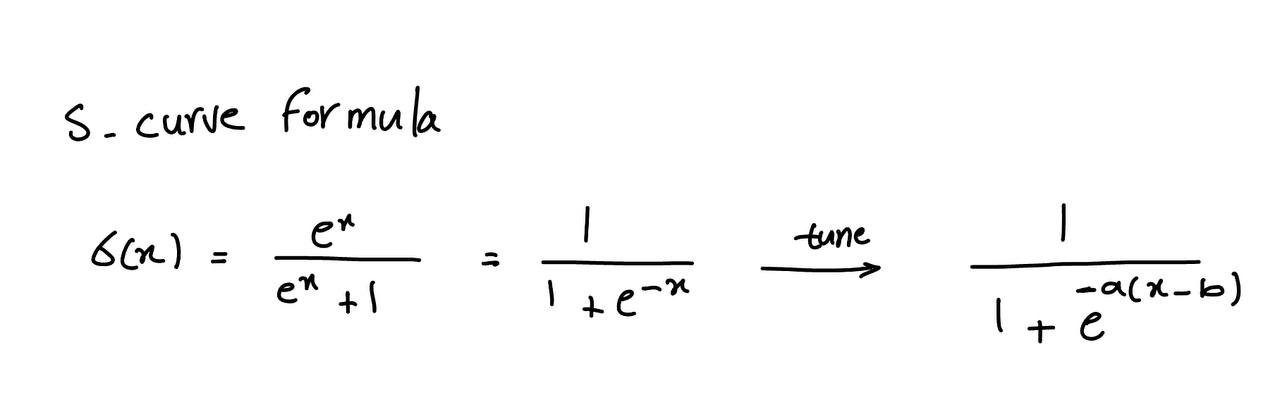

In [3]:
def sigmoid(x, a, b):
     y = 1 / (1 + np.exp(-a*(x-b)))
     return y

In [4]:
# Data preprocessing
x_data =x_data/max(x_data)
y_data =y_data/max(y_data)

In [8]:
# split data into trainand test 
msk = np.random.rand(len(df)) < 0.8
x_train = x_data[msk]
x_test = x_data[~msk]

y_train = y_data[msk]
y_test = y_data[~msk]

scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
Returns:
popt
Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.

In [9]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_data, y_data)
print(" a = %f, b = %f" % (popt[0], popt[1]))

 a = 690.451709, b = 0.997207


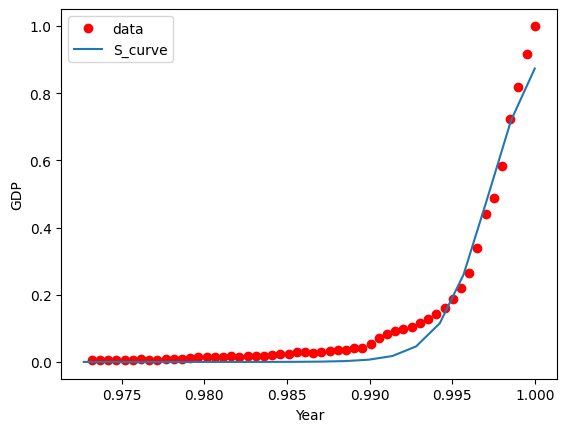

In [10]:
x = np.linspace(1960, 2015, 20)
x = x/max(x)
y = sigmoid(x, *popt)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x,y, label='S_curve')
plt.legend()
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [12]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, x_train, y_train)

In [13]:
# predict using test set
Predicted_y = sigmoid(x_test, *popt)
abs_error = np.absolute(Predicted_y - y_test)

In [21]:
# evaluation
from sklearn.metrics import r2_score
print("Mean absolute error: %.3f" % np.mean(abs_error))
print("Residual sum of squares (MSE): %.3f" % np.mean(abs_error ** 2))
print("R2-score: %.3f" % r2_score(Predicted_y , y_test))

Mean absolute error: 0.044
Residual sum of squares (MSE): 0.003
R2-score: 0.962
